In [471]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [422]:
pd.set_option('max_columns', None)

In [423]:
df = pd.read_csv("../../HackathonNICD/Data/1. Mandata Vehicle Summary.csv")
df

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END
0,DX66OYU,26/05/2021,2021-05-26 12:33:00,2021-05-27 01:00:00,05:57:59,24.86,00:00:16,0.02,06:28:29,26.98,11:33:16,48.14,12:26:44,51.86,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593088.25
1,DX66OYU,27/05/2021,2021-05-27 01:00:00,2021-05-27 18:09:00,06:26:42,26.85,00:01:18,0.09,10:41:05,44.52,06:50:55,28.54,17:09:05,71.46,43,164.16,264.19,18.95,86.13,8.66,32.60,593088.25,593352.44
2,DX66OYU,28/05/2021,2021-05-28 06:54:00,2021-05-28 20:19:00,08:38:19,35.99,00:00:02,0.00,04:45:55,19.86,10:35:44,44.15,13:24:16,55.85,19,316.42,509.23,37.45,170.24,8.45,33.43,593352.44,593861.67
3,DX66OYU,01/06/2021,2021-06-01 06:54:00,2021-06-02 00:46:00,08:29:09,35.36,00:00:57,0.07,09:21:41,39.01,06:08:13,25.57,17:51:47,74.43,48,282.48,454.61,31.39,142.72,9.00,31.39,593861.67,594316.27
4,DX66OYU,02/06/2021,2021-06-02 06:25:00,2021-06-02 18:24:00,04:34:05,19.03,00:00:00,0.00,07:24:37,30.88,12:01:18,50.09,11:58:42,49.91,35,84.36,135.77,12.99,59.07,6.49,43.51,594316.27,594452.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,YM17NCA,22/12/2021,2021-12-22 07:00:00,2021-12-23 00:00:00,03:59:07,16.61,00:12:24,0.86,12:47:56,53.33,07:00:33,29.20,16:59:27,70.80,23,78.66,126.59,15.65,71.15,5.03,56.20,477036.90,477163.49
4495,YM17NCA,23/12/2021,2021-12-23 00:00:00,2021-12-23 15:05:00,04:51:23,20.23,00:00:00,0.00,10:14:34,42.68,08:54:03,37.09,15:05:57,62.91,30,101.85,163.91,13.96,63.47,7.30,38.72,477163.49,477327.39
4496,YM17NCA,24/12/2021,2021-12-24 11:22:00,2021-12-24 11:24:00,00:01:02,0.07,00:00:00,0.00,00:01:10,0.08,23:57:48,99.85,00:02:12,0.15,1,0.05,0.09,0.03,0.15,1.64,172.94,477327.39,477327.48
4497,YM17NCA,30/12/2021,2021-12-30 13:10:00,2021-12-30 14:20:00,00:00:00,0.00,00:36:23,2.53,00:34:05,2.37,22:49:32,95.11,01:10:28,4.89,0,0.00,0.00,0.42,1.92,0.00,0.00,477327.48,477327.48


In [424]:
df = df.dropna()
df = df.reset_index(drop = True)
df

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END
0,DX66OYU,27/05/2021,2021-05-27 01:00:00,2021-05-27 18:09:00,06:26:42,26.85,00:01:18,0.09,10:41:05,44.52,06:50:55,28.54,17:09:05,71.46,43,164.16,264.19,18.95,86.13,8.66,32.60,593088.25,593352.44
1,DX66OYU,28/05/2021,2021-05-28 06:54:00,2021-05-28 20:19:00,08:38:19,35.99,00:00:02,0.00,04:45:55,19.86,10:35:44,44.15,13:24:16,55.85,19,316.42,509.23,37.45,170.24,8.45,33.43,593352.44,593861.67
2,DX66OYU,01/06/2021,2021-06-01 06:54:00,2021-06-02 00:46:00,08:29:09,35.36,00:00:57,0.07,09:21:41,39.01,06:08:13,25.57,17:51:47,74.43,48,282.48,454.61,31.39,142.72,9.00,31.39,593861.67,594316.27
3,DX66OYU,02/06/2021,2021-06-02 06:25:00,2021-06-02 18:24:00,04:34:05,19.03,00:00:00,0.00,07:24:37,30.88,12:01:18,50.09,11:58:42,49.91,35,84.36,135.77,12.99,59.07,6.49,43.51,594316.27,594452.04
4,DX66OYU,03/06/2021,2021-06-03 07:56:00,2021-06-04 01:00:00,07:59:22,33.29,00:03:13,0.22,09:01:17,37.59,06:56:08,28.90,17:03:52,71.10,34,273.51,440.18,32.25,146.61,8.48,33.31,594452.04,594892.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,22/12/2021,2021-12-22 07:00:00,2021-12-23 00:00:00,03:59:07,16.61,00:12:24,0.86,12:47:56,53.33,07:00:33,29.20,16:59:27,70.80,23,78.66,126.59,15.65,71.15,5.03,56.20,477036.90,477163.49
4492,YM17NCA,23/12/2021,2021-12-23 00:00:00,2021-12-23 15:05:00,04:51:23,20.23,00:00:00,0.00,10:14:34,42.68,08:54:03,37.09,15:05:57,62.91,30,101.85,163.91,13.96,63.47,7.30,38.72,477163.49,477327.39
4493,YM17NCA,24/12/2021,2021-12-24 11:22:00,2021-12-24 11:24:00,00:01:02,0.07,00:00:00,0.00,00:01:10,0.08,23:57:48,99.85,00:02:12,0.15,1,0.05,0.09,0.03,0.15,1.64,172.94,477327.39,477327.48
4494,YM17NCA,30/12/2021,2021-12-30 13:10:00,2021-12-30 14:20:00,00:00:00,0.00,00:36:23,2.53,00:34:05,2.37,22:49:32,95.11,01:10:28,4.89,0,0.00,0.00,0.42,1.92,0.00,0.00,477327.48,477327.48


In [425]:
def duration_minutes(df): 
    df= df.str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))

    return df

In [426]:
df[["DRIVING_TIME", "IDLE_TIME", "STANDING_TIME", "INACTIVE_TIME", "UTILISATION"]] = df[["DRIVING_TIME", "IDLE_TIME", "STANDING_TIME", "INACTIVE_TIME", "UTILISATION"]].apply(duration_minutes)
df

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END
0,DX66OYU,27/05/2021,2021-05-27 01:00:00,2021-05-27 18:09:00,386,26.85,1,0.09,641,44.52,410,28.54,1029,71.46,43,164.16,264.19,18.95,86.13,8.66,32.60,593088.25,593352.44
1,DX66OYU,28/05/2021,2021-05-28 06:54:00,2021-05-28 20:19:00,518,35.99,0,0.00,285,19.86,635,44.15,804,55.85,19,316.42,509.23,37.45,170.24,8.45,33.43,593352.44,593861.67
2,DX66OYU,01/06/2021,2021-06-01 06:54:00,2021-06-02 00:46:00,509,35.36,0,0.07,561,39.01,368,25.57,1071,74.43,48,282.48,454.61,31.39,142.72,9.00,31.39,593861.67,594316.27
3,DX66OYU,02/06/2021,2021-06-02 06:25:00,2021-06-02 18:24:00,274,19.03,0,0.00,444,30.88,721,50.09,718,49.91,35,84.36,135.77,12.99,59.07,6.49,43.51,594316.27,594452.04
4,DX66OYU,03/06/2021,2021-06-03 07:56:00,2021-06-04 01:00:00,479,33.29,3,0.22,541,37.59,416,28.90,1023,71.10,34,273.51,440.18,32.25,146.61,8.48,33.31,594452.04,594892.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,22/12/2021,2021-12-22 07:00:00,2021-12-23 00:00:00,239,16.61,12,0.86,767,53.33,420,29.20,1019,70.80,23,78.66,126.59,15.65,71.15,5.03,56.20,477036.90,477163.49
4492,YM17NCA,23/12/2021,2021-12-23 00:00:00,2021-12-23 15:05:00,291,20.23,0,0.00,614,42.68,534,37.09,905,62.91,30,101.85,163.91,13.96,63.47,7.30,38.72,477163.49,477327.39
4493,YM17NCA,24/12/2021,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0.07,0,0.00,1,0.08,1437,99.85,2,0.15,1,0.05,0.09,0.03,0.15,1.64,172.94,477327.39,477327.48
4494,YM17NCA,30/12/2021,2021-12-30 13:10:00,2021-12-30 14:20:00,0,0.00,36,2.53,34,2.37,1369,95.11,70,4.89,0,0.00,0.00,0.42,1.92,0.00,0.00,477327.48,477327.48


In [427]:
df.isnull().sum()

REG                 0
DATE                0
START               0
END                 0
DRIVING_TIME        0
DRIVE_PERC          0
IDLE_TIME           0
IDLE_PERC           0
STANDING_TIME       0
STANDING_PERC       0
INACTIVE_TIME       0
INACTIVE_PERC       0
UTILISATION         0
UTILISATION_PERC    0
JOURNEYS            0
MILES               0
KM                  0
GALLONS             0
LITRES              0
MPG                 0
L_100KM             0
ODOMETER_START      0
ODOMETER_END        0
dtype: int64

In [428]:
df["mileage"] = df["KM"] / df["LITRES"]
df.loc[~np.isfinite(df['mileage']), 'mileage'] = np.nan
df

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END,mileage
0,DX66OYU,27/05/2021,2021-05-27 01:00:00,2021-05-27 18:09:00,386,26.85,1,0.09,641,44.52,410,28.54,1029,71.46,43,164.16,264.19,18.95,86.13,8.66,32.60,593088.25,593352.44,3.067340
1,DX66OYU,28/05/2021,2021-05-28 06:54:00,2021-05-28 20:19:00,518,35.99,0,0.00,285,19.86,635,44.15,804,55.85,19,316.42,509.23,37.45,170.24,8.45,33.43,593352.44,593861.67,2.991248
2,DX66OYU,01/06/2021,2021-06-01 06:54:00,2021-06-02 00:46:00,509,35.36,0,0.07,561,39.01,368,25.57,1071,74.43,48,282.48,454.61,31.39,142.72,9.00,31.39,593861.67,594316.27,3.185328
3,DX66OYU,02/06/2021,2021-06-02 06:25:00,2021-06-02 18:24:00,274,19.03,0,0.00,444,30.88,721,50.09,718,49.91,35,84.36,135.77,12.99,59.07,6.49,43.51,594316.27,594452.04,2.298459
4,DX66OYU,03/06/2021,2021-06-03 07:56:00,2021-06-04 01:00:00,479,33.29,3,0.22,541,37.59,416,28.90,1023,71.10,34,273.51,440.18,32.25,146.61,8.48,33.31,594452.04,594892.21,3.002387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,22/12/2021,2021-12-22 07:00:00,2021-12-23 00:00:00,239,16.61,12,0.86,767,53.33,420,29.20,1019,70.80,23,78.66,126.59,15.65,71.15,5.03,56.20,477036.90,477163.49,1.779199
4492,YM17NCA,23/12/2021,2021-12-23 00:00:00,2021-12-23 15:05:00,291,20.23,0,0.00,614,42.68,534,37.09,905,62.91,30,101.85,163.91,13.96,63.47,7.30,38.72,477163.49,477327.39,2.582480
4493,YM17NCA,24/12/2021,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0.07,0,0.00,1,0.08,1437,99.85,2,0.15,1,0.05,0.09,0.03,0.15,1.64,172.94,477327.39,477327.48,0.600000
4494,YM17NCA,30/12/2021,2021-12-30 13:10:00,2021-12-30 14:20:00,0,0.00,36,2.53,34,2.37,1369,95.11,70,4.89,0,0.00,0.00,0.42,1.92,0.00,0.00,477327.48,477327.48,0.000000


In [429]:
df.isnull().sum()

REG                  0
DATE                 0
START                0
END                  0
DRIVING_TIME         0
DRIVE_PERC           0
IDLE_TIME            0
IDLE_PERC            0
STANDING_TIME        0
STANDING_PERC        0
INACTIVE_TIME        0
INACTIVE_PERC        0
UTILISATION          0
UTILISATION_PERC     0
JOURNEYS             0
MILES                0
KM                   0
GALLONS              0
LITRES               0
MPG                  0
L_100KM              0
ODOMETER_START       0
ODOMETER_END         0
mileage             12
dtype: int64

In [430]:
df[df.isnull().any(axis=1)]

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END,mileage
165,DX66OYU,29/12/2021,2021-12-29 15:37:00,2021-12-29 15:38:00,0,0.00,0,0.0,0,0.03,1439,99.97,0,0.03,0,0.00,0.00,0.0,0.0,0.0,0.0,657749.97,657749.97,NaN
1351,NK17LGF,04/12/2021,2021-12-04 08:36:00,2021-12-04 08:37:00,0,0.00,0,0.0,0,0.05,1439,99.95,0,0.05,0,0.00,0.00,0.0,0.0,0.0,0.0,452724.92,452724.92,NaN
1623,NK17LGG,04/12/2021,2021-12-04 08:04:00,2021-12-04 08:04:00,0,0.00,0,0.0,0,0.02,1439,99.98,0,0.02,0,0.00,0.00,0.0,0.0,0.0,0.0,397100.36,397100.36,NaN
2133,NK17LGL,17/10/2021,2021-10-17 11:46:00,2021-10-17 11:46:00,0,0.04,0,0.0,0,0.01,1439,99.95,0,0.05,1,0.04,0.07,0.0,0.0,0.0,0.0,438133.16,438133.23,NaN
2645,NK67LKE,04/09/2021,2021-09-04 09:36:00,2021-09-04 09:36:00,0,0.00,0,0.0,0,0.03,1439,99.97,0,0.03,0,0.00,0.00,0.0,0.0,0.0,0.0,316047.78,316047.78,NaN
2864,NK67LKF,20/06/2021,2021-06-20 12:31:00,2021-06-20 12:47:00,0,0.00,0,0.0,15,1.11,1424,98.89,15,1.11,0,0.00,0.00,0.0,0.0,0.0,0.0,317979.74,317979.74,NaN
3767,NK67LKZ,03/10/2021,2021-10-03 14:12:00,2021-10-03 14:31:00,0,0.00,0,0.0,19,1.34,1420,98.66,19,1.34,0,0.00,0.00,0.0,0.0,0.0,0.0,321120.62,321120.62,NaN
3824,NK67LKZ,12/12/2021,2021-12-12 14:10:00,2021-12-12 14:12:00,0,0.00,0,0.0,1,0.12,1438,99.88,1,0.12,0,0.00,0.00,0.0,0.0,0.0,0.0,350840.23,350840.23,NaN
4363,NK67LLC,04/12/2021,2021-12-04 08:27:00,2021-12-04 08:27:00,0,0.00,0,0.0,0,0.00,1439,100.00,0,0.00,0,0.00,0.00,0.0,0.0,0.0,0.0,371896.89,371896.89,NaN
4395,YM17NCA,17/08/2021,2021-08-17 13:49:00,2021-08-17 13:53:00,0,0.00,0,0.0,4,0.32,1435,99.68,4,0.32,0,0.00,0.00,0.0,0.0,0.0,0.0,441843.93,441843.93,NaN


In [431]:
df["mileage"].fillna(df["mileage"].mean(), inplace=True)

In [432]:
df.drop(["ODOMETER_START", "ODOMETER_END", "JOURNEYS", "GALLONS", "MPG", "MILES", "L_100KM"], axis = 1, inplace = True, errors="ignore")

In [433]:
df

,REG,DATE,START,END,DRIVING_TIME,DRIVE_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION,UTILISATION_PERC,KM,LITRES,mileage
0,DX66OYU,27/05/2021,2021-05-27 01:00:00,2021-05-27 18:09:00,386,26.85,1,0.09,641,44.52,410,28.54,1029,71.46,264.19,86.13,3.067340
1,DX66OYU,28/05/2021,2021-05-28 06:54:00,2021-05-28 20:19:00,518,35.99,0,0.00,285,19.86,635,44.15,804,55.85,509.23,170.24,2.991248
2,DX66OYU,01/06/2021,2021-06-01 06:54:00,2021-06-02 00:46:00,509,35.36,0,0.07,561,39.01,368,25.57,1071,74.43,454.61,142.72,3.185328
3,DX66OYU,02/06/2021,2021-06-02 06:25:00,2021-06-02 18:24:00,274,19.03,0,0.00,444,30.88,721,50.09,718,49.91,135.77,59.07,2.298459
4,DX66OYU,03/06/2021,2021-06-03 07:56:00,2021-06-04 01:00:00,479,33.29,3,0.22,541,37.59,416,28.90,1023,71.10,440.18,146.61,3.002387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,22/12/2021,2021-12-22 07:00:00,2021-12-23 00:00:00,239,16.61,12,0.86,767,53.33,420,29.20,1019,70.80,126.59,71.15,1.779199
4492,YM17NCA,23/12/2021,2021-12-23 00:00:00,2021-12-23 15:05:00,291,20.23,0,0.00,614,42.68,534,37.09,905,62.91,163.91,63.47,2.582480
4493,YM17NCA,24/12/2021,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0.07,0,0.00,1,0.08,1437,99.85,2,0.15,0.09,0.15,0.600000
4494,YM17NCA,30/12/2021,2021-12-30 13:10:00,2021-12-30 14:20:00,0,0.00,36,2.53,34,2.37,1369,95.11,70,4.89,0.00,1.92,0.000000


In [434]:
df.columns

Index(['REG', 'DATE', 'START', 'END', 'DRIVING_TIME', 'DRIVE_PERC',
       'IDLE_TIME', 'IDLE_PERC', 'STANDING_TIME', 'STANDING_PERC',
       'INACTIVE_TIME', 'INACTIVE_PERC', 'UTILISATION', 'UTILISATION_PERC',
       'KM', 'LITRES', 'mileage'],
      dtype='object')

In [435]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["START"] = pd.to_datetime(df["START"])
df["END"] = pd.to_datetime(df["END"])

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496 entries, 0 to 4495
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   REG               4496 non-null   object        
 1   DATE              4496 non-null   datetime64[ns]
 2   START             4496 non-null   datetime64[ns]
 3   END               4496 non-null   datetime64[ns]
 4   DRIVING_TIME      4496 non-null   int64         
 5   DRIVE_PERC        4496 non-null   float64       
 6   IDLE_TIME         4496 non-null   int64         
 7   IDLE_PERC         4496 non-null   float64       
 8   STANDING_TIME     4496 non-null   int64         
 9   STANDING_PERC     4496 non-null   float64       
 10  INACTIVE_TIME     4496 non-null   int64         
 11  INACTIVE_PERC     4496 non-null   float64       
 12  UTILISATION       4496 non-null   int64         
 13  UTILISATION_PERC  4496 non-null   float64       
 14  KM                4496 n

In [437]:
df.DATE.min(), df.DATE.max()

(Timestamp('2021-01-02 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [438]:
df.drop(["STANDING_PERC", "INACTIVE_PERC", "UTILISATION_PERC", "IDLE_PERC", "DRIVE_PERC"], axis = 1, inplace=True, errors = "ignore")


In [439]:
df

,REG,DATE,START,END,DRIVING_TIME,IDLE_TIME,STANDING_TIME,INACTIVE_TIME,UTILISATION,KM,LITRES,mileage
0,DX66OYU,2021-05-27,2021-05-27 01:00:00,2021-05-27 18:09:00,386,1,641,410,1029,264.19,86.13,3.067340
1,DX66OYU,2021-05-28,2021-05-28 06:54:00,2021-05-28 20:19:00,518,0,285,635,804,509.23,170.24,2.991248
2,DX66OYU,2021-01-06,2021-06-01 06:54:00,2021-06-02 00:46:00,509,0,561,368,1071,454.61,142.72,3.185328
3,DX66OYU,2021-02-06,2021-06-02 06:25:00,2021-06-02 18:24:00,274,0,444,721,718,135.77,59.07,2.298459
4,DX66OYU,2021-03-06,2021-06-03 07:56:00,2021-06-04 01:00:00,479,3,541,416,1023,440.18,146.61,3.002387
...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,2021-12-22,2021-12-22 07:00:00,2021-12-23 00:00:00,239,12,767,420,1019,126.59,71.15,1.779199
4492,YM17NCA,2021-12-23,2021-12-23 00:00:00,2021-12-23 15:05:00,291,0,614,534,905,163.91,63.47,2.582480
4493,YM17NCA,2021-12-24,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0,1,1437,2,0.09,0.15,0.600000
4494,YM17NCA,2021-12-30,2021-12-30 13:10:00,2021-12-30 14:20:00,0,36,34,1369,70,0.00,1.92,0.000000


<AxesSubplot:ylabel='IDLE_TIME'>

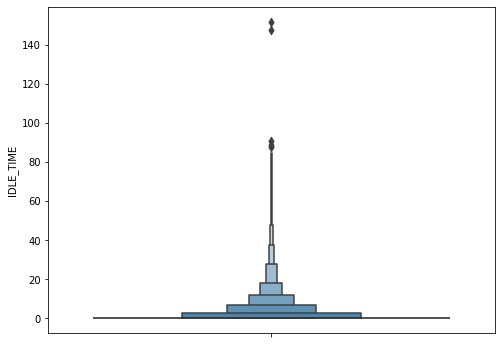

In [440]:
plt.figure(figsize=(8, 6))
sns.boxenplot(y = df["IDLE_TIME"])

In [441]:
df_annual = pd.read_csv("../../HackathonNICD/Data/1a. Mandata Vehicle Annual Summary.csv")
df_annual

,REG,DRIVING_TIME,DRIVING_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION_TIME,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END,CO2_LBS,CO2_KG
0,DX66OYU,1222:41:20,30.51,10:13:33,0.26,1587:20:09,39.60,1187:44:58,29.63,2820:15:02,70.37,6311,40179.07,64662.08,4592.16,20876.43,1391.39,7815.94,593088.25,657749.97,121565.294305,55141.09
1,DX66PFJ,710:14:58,36.54,02:31:54,0.13,654:45:06,33.68,576:28:02,29.65,1367:31:58,70.35,2747,27776.07,44701.41,2904.58,13204.25,728.78,3284.45,450256.78,494957.96,76889.300344,34876.40
2,KP63HZR,1911:32:27,29.61,07:00:02,0.11,2468:05:28,38.23,2069:22:03,32.05,4386:37:57,67.95,11539,59779.95,96206.93,7183.39,32654.50,2161.55,9818.92,399489.12,495695.40,190149.428500,86250.33
3,NK17LGD,1875:24:53,27.51,05:21:16,0.08,1933:03:51,28.36,3002:10:00,44.05,3813:50:00,55.95,8470,70040.09,112719.02,7866.50,35761.53,2447.39,10908.87,345915.39,458633.75,208241.928586,94456.95
4,NK17LGE,1801:27:33,27.29,05:49:52,0.09,2097:54:17,31.79,2694:48:18,40.83,3905:11:42,59.17,9674,61048.30,98248.16,7283.19,33109.87,2172.29,13364.21,351078.90,449326.39,192800.729710,87452.94
5,NK17LGF,1994:10:48,28.17,15:21:16,0.22,2028:29:46,28.65,3041:58:10,42.97,4038:01:50,57.03,8061,76617.81,123304.89,8026.93,36490.49,2711.04,9465.45,334983.01,458287.19,212486.885349,96382.43
6,NK17LGG,1880:42:28,28.70,22:25:46,0.34,2119:04:35,32.34,2529:47:11,38.61,4022:12:49,61.39,8738,64517.82,103831.82,7082.84,32199.35,2360.46,10397.63,302245.22,406076.38,187498.876863,85048.06
7,NK17LGJ,1818:51:17,28.07,05:08:19,0.08,2158:04:45,33.30,2497:55:39,38.55,3982:04:21,61.45,9895,58251.70,93747.56,6539.36,29728.61,2279.92,9385.80,304175.13,397921.98,173111.752153,78522.17
8,NK17LGL,1890:04:29,28.43,09:17:02,0.14,1872:18:52,28.16,2876:19:37,43.27,3771:40:23,56.73,8556,68870.85,110837.40,7280.34,33095.00,2511.80,8746.03,355323.17,466159.93,192714.484873,87413.82
9,NK67LKD,1855:46:17,28.32,05:40:41,0.09,2057:53:17,31.41,2632:39:45,40.18,3919:20:15,59.82,9501,66005.07,106225.44,7050.09,32050.50,2446.88,9143.92,265608.96,371833.69,186632.041295,84654.87


In [442]:
df_annual[["UTILISATION_TIME"]] = df_annual[["UTILISATION_TIME"]].apply(duration_minutes)
df_annual

,REG,DRIVING_TIME,DRIVING_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION_TIME,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END,CO2_LBS,CO2_KG
0,DX66OYU,1222:41:20,30.51,10:13:33,0.26,1587:20:09,39.60,1187:44:58,29.63,169215,70.37,6311,40179.07,64662.08,4592.16,20876.43,1391.39,7815.94,593088.25,657749.97,121565.294305,55141.09
1,DX66PFJ,710:14:58,36.54,02:31:54,0.13,654:45:06,33.68,576:28:02,29.65,82051,70.35,2747,27776.07,44701.41,2904.58,13204.25,728.78,3284.45,450256.78,494957.96,76889.300344,34876.40
2,KP63HZR,1911:32:27,29.61,07:00:02,0.11,2468:05:28,38.23,2069:22:03,32.05,263197,67.95,11539,59779.95,96206.93,7183.39,32654.50,2161.55,9818.92,399489.12,495695.40,190149.428500,86250.33
3,NK17LGD,1875:24:53,27.51,05:21:16,0.08,1933:03:51,28.36,3002:10:00,44.05,228830,55.95,8470,70040.09,112719.02,7866.50,35761.53,2447.39,10908.87,345915.39,458633.75,208241.928586,94456.95
4,NK17LGE,1801:27:33,27.29,05:49:52,0.09,2097:54:17,31.79,2694:48:18,40.83,234311,59.17,9674,61048.30,98248.16,7283.19,33109.87,2172.29,13364.21,351078.90,449326.39,192800.729710,87452.94
5,NK17LGF,1994:10:48,28.17,15:21:16,0.22,2028:29:46,28.65,3041:58:10,42.97,242281,57.03,8061,76617.81,123304.89,8026.93,36490.49,2711.04,9465.45,334983.01,458287.19,212486.885349,96382.43
6,NK17LGG,1880:42:28,28.70,22:25:46,0.34,2119:04:35,32.34,2529:47:11,38.61,241332,61.39,8738,64517.82,103831.82,7082.84,32199.35,2360.46,10397.63,302245.22,406076.38,187498.876863,85048.06
7,NK17LGJ,1818:51:17,28.07,05:08:19,0.08,2158:04:45,33.30,2497:55:39,38.55,238924,61.45,9895,58251.70,93747.56,6539.36,29728.61,2279.92,9385.80,304175.13,397921.98,173111.752153,78522.17
8,NK17LGL,1890:04:29,28.43,09:17:02,0.14,1872:18:52,28.16,2876:19:37,43.27,226300,56.73,8556,68870.85,110837.40,7280.34,33095.00,2511.80,8746.03,355323.17,466159.93,192714.484873,87413.82
9,NK67LKD,1855:46:17,28.32,05:40:41,0.09,2057:53:17,31.41,2632:39:45,40.18,235160,59.82,9501,66005.07,106225.44,7050.09,32050.50,2446.88,9143.92,265608.96,371833.69,186632.041295,84654.87


In [443]:
df_annual["util_min"] = df_annual["CO2_KG"] / df_annual["UTILISATION_TIME"] 
df_annual

,REG,DRIVING_TIME,DRIVING_PERC,IDLE_TIME,IDLE_PERC,STANDING_TIME,STANDING_PERC,INACTIVE_TIME,INACTIVE_PERC,UTILISATION_TIME,UTILISATION_PERC,JOURNEYS,MILES,KM,GALLONS,LITRES,MPG,L_100KM,ODOMETER_START,ODOMETER_END,CO2_LBS,CO2_KG,util_min
0,DX66OYU,1222:41:20,30.51,10:13:33,0.26,1587:20:09,39.60,1187:44:58,29.63,169215,70.37,6311,40179.07,64662.08,4592.16,20876.43,1391.39,7815.94,593088.25,657749.97,121565.294305,55141.09,0.325864
1,DX66PFJ,710:14:58,36.54,02:31:54,0.13,654:45:06,33.68,576:28:02,29.65,82051,70.35,2747,27776.07,44701.41,2904.58,13204.25,728.78,3284.45,450256.78,494957.96,76889.300344,34876.40,0.425058
2,KP63HZR,1911:32:27,29.61,07:00:02,0.11,2468:05:28,38.23,2069:22:03,32.05,263197,67.95,11539,59779.95,96206.93,7183.39,32654.50,2161.55,9818.92,399489.12,495695.40,190149.428500,86250.33,0.327703
3,NK17LGD,1875:24:53,27.51,05:21:16,0.08,1933:03:51,28.36,3002:10:00,44.05,228830,55.95,8470,70040.09,112719.02,7866.50,35761.53,2447.39,10908.87,345915.39,458633.75,208241.928586,94456.95,0.412782
4,NK17LGE,1801:27:33,27.29,05:49:52,0.09,2097:54:17,31.79,2694:48:18,40.83,234311,59.17,9674,61048.30,98248.16,7283.19,33109.87,2172.29,13364.21,351078.90,449326.39,192800.729710,87452.94,0.373234
5,NK17LGF,1994:10:48,28.17,15:21:16,0.22,2028:29:46,28.65,3041:58:10,42.97,242281,57.03,8061,76617.81,123304.89,8026.93,36490.49,2711.04,9465.45,334983.01,458287.19,212486.885349,96382.43,0.397813
6,NK17LGG,1880:42:28,28.70,22:25:46,0.34,2119:04:35,32.34,2529:47:11,38.61,241332,61.39,8738,64517.82,103831.82,7082.84,32199.35,2360.46,10397.63,302245.22,406076.38,187498.876863,85048.06,0.352411
7,NK17LGJ,1818:51:17,28.07,05:08:19,0.08,2158:04:45,33.30,2497:55:39,38.55,238924,61.45,9895,58251.70,93747.56,6539.36,29728.61,2279.92,9385.80,304175.13,397921.98,173111.752153,78522.17,0.328649
8,NK17LGL,1890:04:29,28.43,09:17:02,0.14,1872:18:52,28.16,2876:19:37,43.27,226300,56.73,8556,68870.85,110837.40,7280.34,33095.00,2511.80,8746.03,355323.17,466159.93,192714.484873,87413.82,0.386274
9,NK67LKD,1855:46:17,28.32,05:40:41,0.09,2057:53:17,31.41,2632:39:45,40.18,235160,59.82,9501,66005.07,106225.44,7050.09,32050.50,2446.88,9143.92,265608.96,371833.69,186632.041295,84654.87,0.359988


In [444]:
dfannual_clip = df_annual[["REG","util_min"]]
df_final = pd.merge(df, dfannual_clip, on="REG", how="outer")
df_final

,REG,DATE,START,END,DRIVING_TIME,IDLE_TIME,STANDING_TIME,INACTIVE_TIME,UTILISATION,KM,LITRES,mileage,util_min
0,DX66OYU,2021-05-27,2021-05-27 01:00:00,2021-05-27 18:09:00,386,1,641,410,1029,264.19,86.13,3.067340,0.325864
1,DX66OYU,2021-05-28,2021-05-28 06:54:00,2021-05-28 20:19:00,518,0,285,635,804,509.23,170.24,2.991248,0.325864
2,DX66OYU,2021-01-06,2021-06-01 06:54:00,2021-06-02 00:46:00,509,0,561,368,1071,454.61,142.72,3.185328,0.325864
3,DX66OYU,2021-02-06,2021-06-02 06:25:00,2021-06-02 18:24:00,274,0,444,721,718,135.77,59.07,2.298459,0.325864
4,DX66OYU,2021-03-06,2021-06-03 07:56:00,2021-06-04 01:00:00,479,3,541,416,1023,440.18,146.61,3.002387,0.325864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,2021-12-22,2021-12-22 07:00:00,2021-12-23 00:00:00,239,12,767,420,1019,126.59,71.15,1.779199,0.313207
4492,YM17NCA,2021-12-23,2021-12-23 00:00:00,2021-12-23 15:05:00,291,0,614,534,905,163.91,63.47,2.582480,0.313207
4493,YM17NCA,2021-12-24,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0,1,1437,2,0.09,0.15,0.600000,0.313207
4494,YM17NCA,2021-12-30,2021-12-30 13:10:00,2021-12-30 14:20:00,0,36,34,1369,70,0.00,1.92,0.000000,0.313207


In [445]:
df_final["CO2"] = df_final["util_min"] * df_final["UTILISATION"]
df_final

,REG,DATE,START,END,DRIVING_TIME,IDLE_TIME,STANDING_TIME,INACTIVE_TIME,UTILISATION,KM,LITRES,mileage,util_min,CO2
0,DX66OYU,2021-05-27,2021-05-27 01:00:00,2021-05-27 18:09:00,386,1,641,410,1029,264.19,86.13,3.067340,0.325864,335.314137
1,DX66OYU,2021-05-28,2021-05-28 06:54:00,2021-05-28 20:19:00,518,0,285,635,804,509.23,170.24,2.991248,0.325864,261.994719
2,DX66OYU,2021-01-06,2021-06-01 06:54:00,2021-06-02 00:46:00,509,0,561,368,1071,454.61,142.72,3.185328,0.325864,349.000428
3,DX66OYU,2021-02-06,2021-06-02 06:25:00,2021-06-02 18:24:00,274,0,444,721,718,135.77,59.07,2.298459,0.325864,233.970408
4,DX66OYU,2021-03-06,2021-06-03 07:56:00,2021-06-04 01:00:00,479,3,541,416,1023,440.18,146.61,3.002387,0.325864,333.358952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,2021-12-22,2021-12-22 07:00:00,2021-12-23 00:00:00,239,12,767,420,1019,126.59,71.15,1.779199,0.313207,319.158364
4492,YM17NCA,2021-12-23,2021-12-23 00:00:00,2021-12-23 15:05:00,291,0,614,534,905,163.91,63.47,2.582480,0.313207,283.452718
4493,YM17NCA,2021-12-24,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0,1,1437,2,0.09,0.15,0.600000,0.313207,0.626415
4494,YM17NCA,2021-12-30,2021-12-30 13:10:00,2021-12-30 14:20:00,0,36,34,1369,70,0.00,1.92,0.000000,0.313207,21.924520


In [446]:
df_final.drop(["INACTIVE_TIME", "util_min"], axis = 1, inplace=True, errors="ignore")

In [447]:
df_final.corr()

,DRIVING_TIME,IDLE_TIME,STANDING_TIME,UTILISATION,KM,LITRES,mileage,CO2
DRIVING_TIME,1.000000,0.043665,0.341611,0.792025,0.931306,0.948789,0.448324,0.792314
IDLE_TIME,0.043665,1.000000,0.024487,0.059951,0.038376,0.041981,-0.026759,0.058263
STANDING_TIME,0.341611,0.024487,1.000000,0.844041,0.120644,0.230414,-0.155517,0.804994
UTILISATION,0.792025,0.059951,0.844041,1.000000,0.609386,0.690663,0.153825,0.974779
KM,0.931306,0.038376,0.120644,0.609386,1.000000,0.960295,0.586999,0.628377
LITRES,0.948789,0.041981,0.230414,0.690663,0.960295,1.000000,0.407026,0.706491
mileage,0.448324,-0.026759,-0.155517,0.153825,0.586999,0.407026,1.000000,0.169593
CO2,0.792314,0.058263,0.804994,0.974779,0.628377,0.706491,0.169593,1.000000


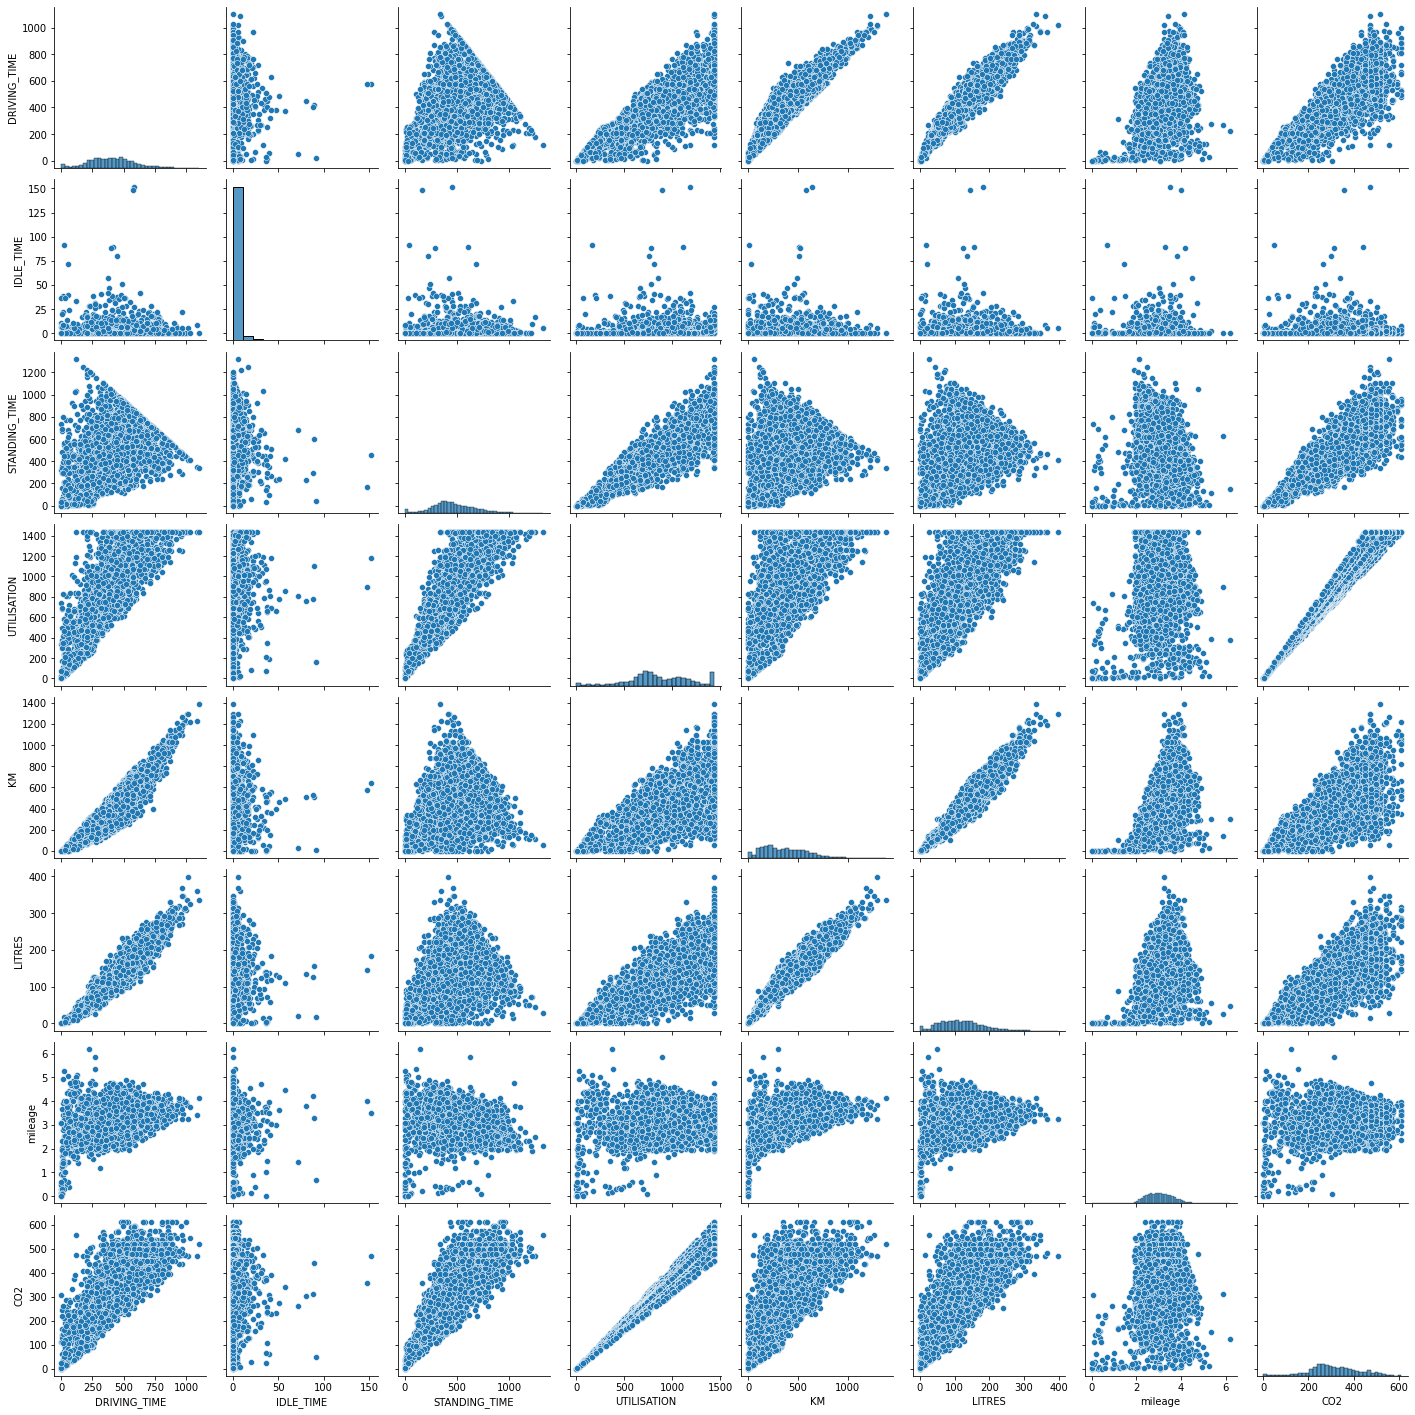

In [448]:
sns.pairplot(df_final)

In [449]:
def date_time_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_weekday"] = df[col].dt.weekday
    #df[col + "_time"] = df[col].dt.time 
    df[col + '_hour'] = df[col].dt.hour
    #df[col + '_minute'] = df[col].dt.minute
    #df[col + '_second'] = df[col].dt.second

    return date_time_extract

In [450]:
date_time_extract(df_final, "START")
date_time_extract(df_final, "END")

<function __main__.date_time_extract(df, col)>

In [451]:
df_final

,REG,DATE,START,END,DRIVING_TIME,IDLE_TIME,STANDING_TIME,UTILISATION,KM,LITRES,mileage,CO2,START_year,START_month,START_day,START_weekday,START_hour,END_year,END_month,END_day,END_weekday,END_hour
0,DX66OYU,2021-05-27,2021-05-27 01:00:00,2021-05-27 18:09:00,386,1,641,1029,264.19,86.13,3.067340,335.314137,2021,5,27,3,1,2021,5,27,3,18
1,DX66OYU,2021-05-28,2021-05-28 06:54:00,2021-05-28 20:19:00,518,0,285,804,509.23,170.24,2.991248,261.994719,2021,5,28,4,6,2021,5,28,4,20
2,DX66OYU,2021-01-06,2021-06-01 06:54:00,2021-06-02 00:46:00,509,0,561,1071,454.61,142.72,3.185328,349.000428,2021,6,1,1,6,2021,6,2,2,0
3,DX66OYU,2021-02-06,2021-06-02 06:25:00,2021-06-02 18:24:00,274,0,444,718,135.77,59.07,2.298459,233.970408,2021,6,2,2,6,2021,6,2,2,18
4,DX66OYU,2021-03-06,2021-06-03 07:56:00,2021-06-04 01:00:00,479,3,541,1023,440.18,146.61,3.002387,333.358952,2021,6,3,3,7,2021,6,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,2021-12-22,2021-12-22 07:00:00,2021-12-23 00:00:00,239,12,767,1019,126.59,71.15,1.779199,319.158364,2021,12,22,2,7,2021,12,23,3,0
4492,YM17NCA,2021-12-23,2021-12-23 00:00:00,2021-12-23 15:05:00,291,0,614,905,163.91,63.47,2.582480,283.452718,2021,12,23,3,0,2021,12,23,3,15
4493,YM17NCA,2021-12-24,2021-12-24 11:22:00,2021-12-24 11:24:00,1,0,1,2,0.09,0.15,0.600000,0.626415,2021,12,24,4,11,2021,12,24,4,11
4494,YM17NCA,2021-12-30,2021-12-30 13:10:00,2021-12-30 14:20:00,0,36,34,70,0.00,1.92,0.000000,21.924520,2021,12,30,3,13,2021,12,30,3,14


In [452]:
df_final.drop(["START_year", "END_year", "START", "END", "DATE"], axis = 1, inplace = True, errors = "ignore")
df_final

,REG,DRIVING_TIME,IDLE_TIME,STANDING_TIME,UTILISATION,KM,LITRES,mileage,CO2,START_month,START_day,START_weekday,START_hour,END_month,END_day,END_weekday,END_hour
0,DX66OYU,386,1,641,1029,264.19,86.13,3.067340,335.314137,5,27,3,1,5,27,3,18
1,DX66OYU,518,0,285,804,509.23,170.24,2.991248,261.994719,5,28,4,6,5,28,4,20
2,DX66OYU,509,0,561,1071,454.61,142.72,3.185328,349.000428,6,1,1,6,6,2,2,0
3,DX66OYU,274,0,444,718,135.77,59.07,2.298459,233.970408,6,2,2,6,6,2,2,18
4,DX66OYU,479,3,541,1023,440.18,146.61,3.002387,333.358952,6,3,3,7,6,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,YM17NCA,239,12,767,1019,126.59,71.15,1.779199,319.158364,12,22,2,7,12,23,3,0
4492,YM17NCA,291,0,614,905,163.91,63.47,2.582480,283.452718,12,23,3,0,12,23,3,15
4493,YM17NCA,1,0,1,2,0.09,0.15,0.600000,0.626415,12,24,4,11,12,24,4,11
4494,YM17NCA,0,36,34,70,0.00,1.92,0.000000,21.924520,12,30,3,13,12,30,3,14


<AxesSubplot:title={'center':'HeatMap for variables'}>

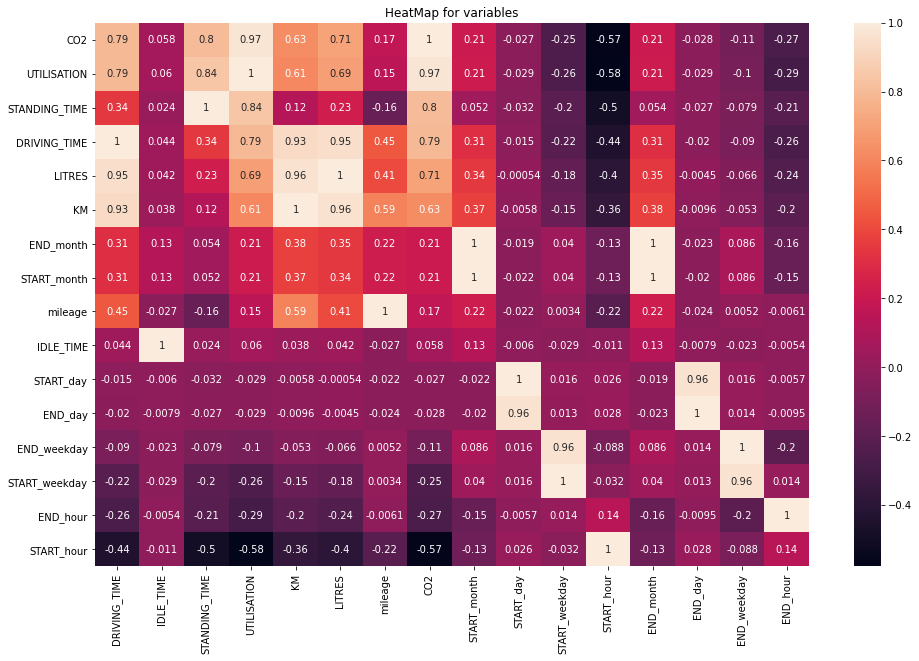

In [453]:
plt.figure(figsize=(16, 10))
plt.title("HeatMap for variables")
sns.heatmap(df_final.corr().sort_values(by="CO2", ascending=False), annot = True)

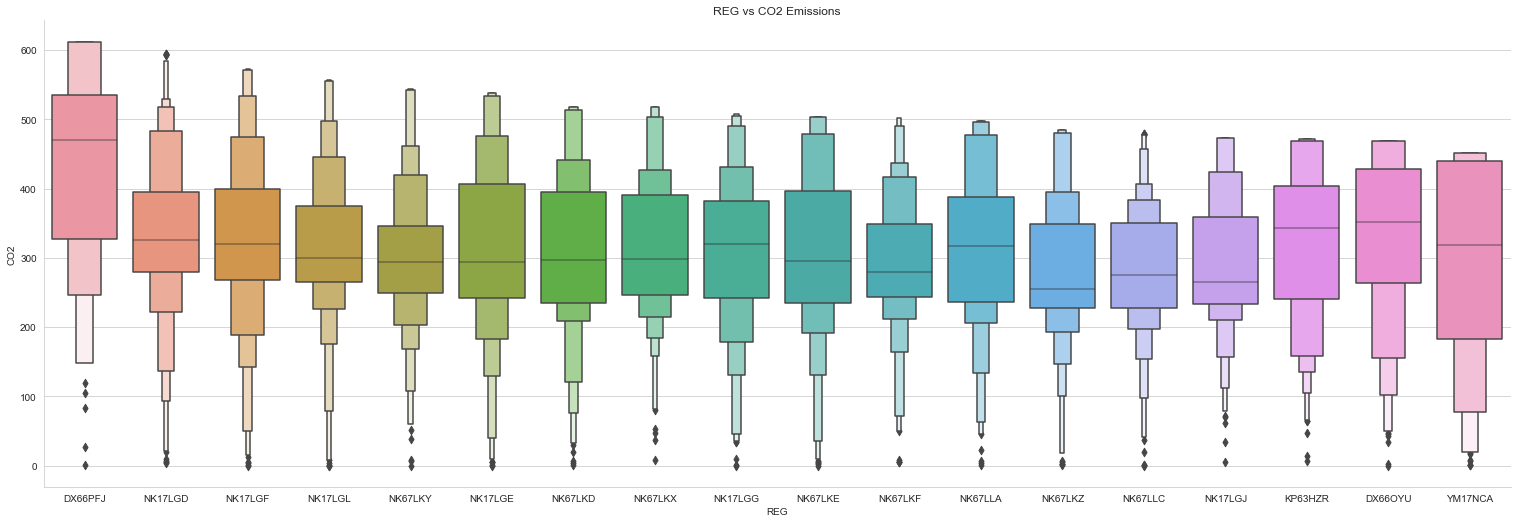

In [455]:
sns.set_style("whitegrid")
sns.catplot(y = "CO2", x = "REG", data = df_final.sort_values("CO2", ascending = False), kind="boxen", height = 7, aspect = 3).set(title = "REG vs CO2 Emissions")
plt.show()

In [456]:
dummy_reg = pd.get_dummies(df_final["REG"], prefix="REG")
df_final = pd.concat([df_final, dummy_reg], axis=1)
df_final.head()

,REG,DRIVING_TIME,IDLE_TIME,STANDING_TIME,UTILISATION,KM,LITRES,mileage,CO2,START_month,START_day,START_weekday,START_hour,END_month,END_day,END_weekday,END_hour,REG_DX66OYU,REG_DX66PFJ,REG_KP63HZR,REG_NK17LGD,REG_NK17LGE,REG_NK17LGF,REG_NK17LGG,REG_NK17LGJ,REG_NK17LGL,REG_NK67LKD,REG_NK67LKE,REG_NK67LKF,REG_NK67LKX,REG_NK67LKY,REG_NK67LKZ,REG_NK67LLA,REG_NK67LLC,REG_YM17NCA
0,DX66OYU,386,1,641,1029,264.19,86.13,3.067340,335.314137,5,27,3,1,5,27,3,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DX66OYU,518,0,285,804,509.23,170.24,2.991248,261.994719,5,28,4,6,5,28,4,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DX66OYU,509,0,561,1071,454.61,142.72,3.185328,349.000428,6,1,1,6,6,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DX66OYU,274,0,444,718,135.77,59.07,2.298459,233.970408,6,2,2,6,6,2,2,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DX66OYU,479,3,541,1023,440.18,146.61,3.002387,333.358952,6,3,3,7,6,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [457]:
df_final.drop(["REG"], axis = 1, inplace = True, errors = "ignore")
df_final

,DRIVING_TIME,IDLE_TIME,STANDING_TIME,UTILISATION,KM,LITRES,mileage,CO2,START_month,START_day,START_weekday,START_hour,END_month,END_day,END_weekday,END_hour,REG_DX66OYU,REG_DX66PFJ,REG_KP63HZR,REG_NK17LGD,REG_NK17LGE,REG_NK17LGF,REG_NK17LGG,REG_NK17LGJ,REG_NK17LGL,REG_NK67LKD,REG_NK67LKE,REG_NK67LKF,REG_NK67LKX,REG_NK67LKY,REG_NK67LKZ,REG_NK67LLA,REG_NK67LLC,REG_YM17NCA
0,386,1,641,1029,264.19,86.13,3.067340,335.314137,5,27,3,1,5,27,3,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,518,0,285,804,509.23,170.24,2.991248,261.994719,5,28,4,6,5,28,4,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,509,0,561,1071,454.61,142.72,3.185328,349.000428,6,1,1,6,6,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,274,0,444,718,135.77,59.07,2.298459,233.970408,6,2,2,6,6,2,2,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,479,3,541,1023,440.18,146.61,3.002387,333.358952,6,3,3,7,6,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,239,12,767,1019,126.59,71.15,1.779199,319.158364,12,22,2,7,12,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4492,291,0,614,905,163.91,63.47,2.582480,283.452718,12,23,3,0,12,23,3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4493,1,0,1,2,0.09,0.15,0.600000,0.626415,12,24,4,11,12,24,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4494,0,36,34,70,0.00,1.92,0.000000,21.924520,12,30,3,13,12,30,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:title={'center':'HeatMap for variables'}>

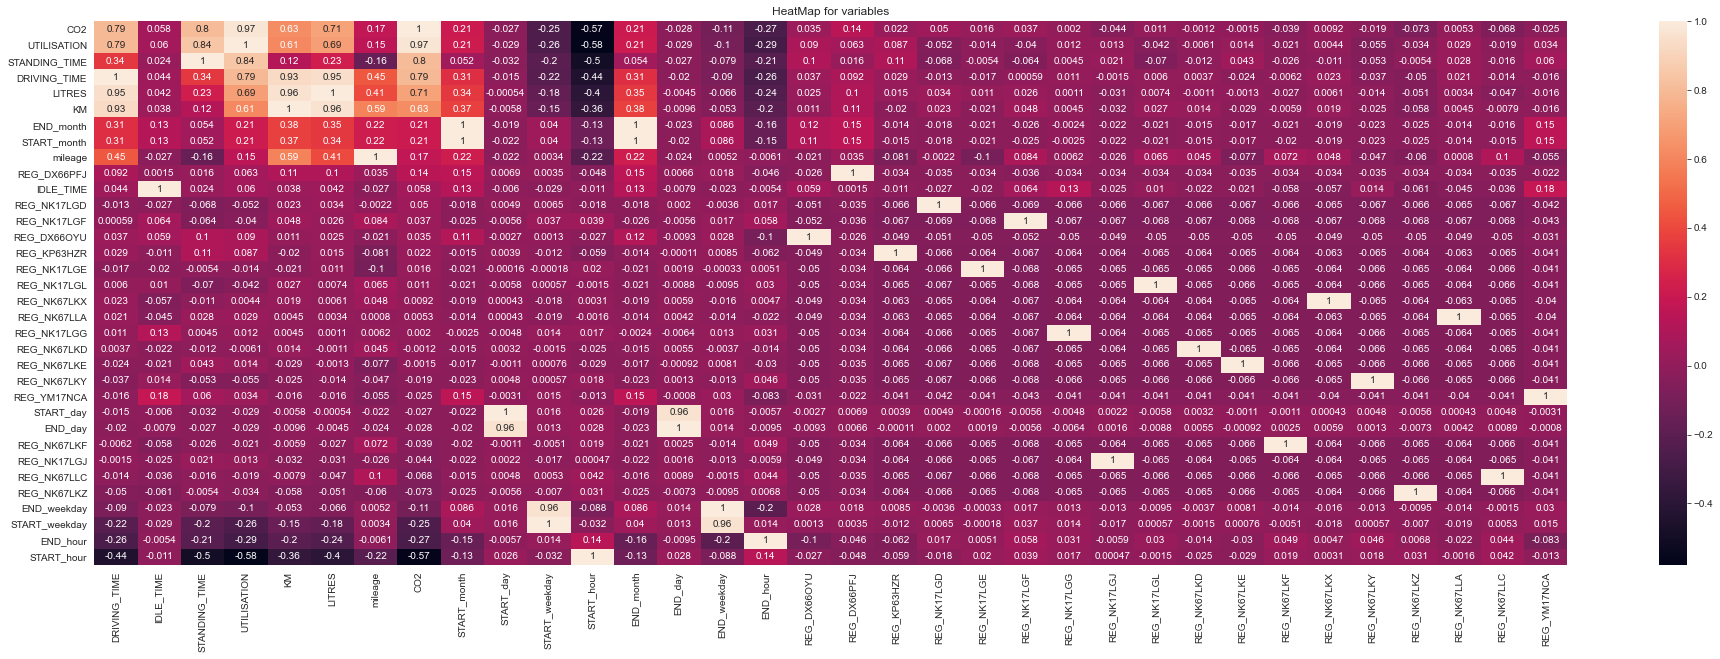

In [458]:
plt.figure(figsize=(33, 10))
plt.title("HeatMap for variables")
sns.heatmap(df_final.corr().sort_values(by="CO2", ascending=False), annot = True)

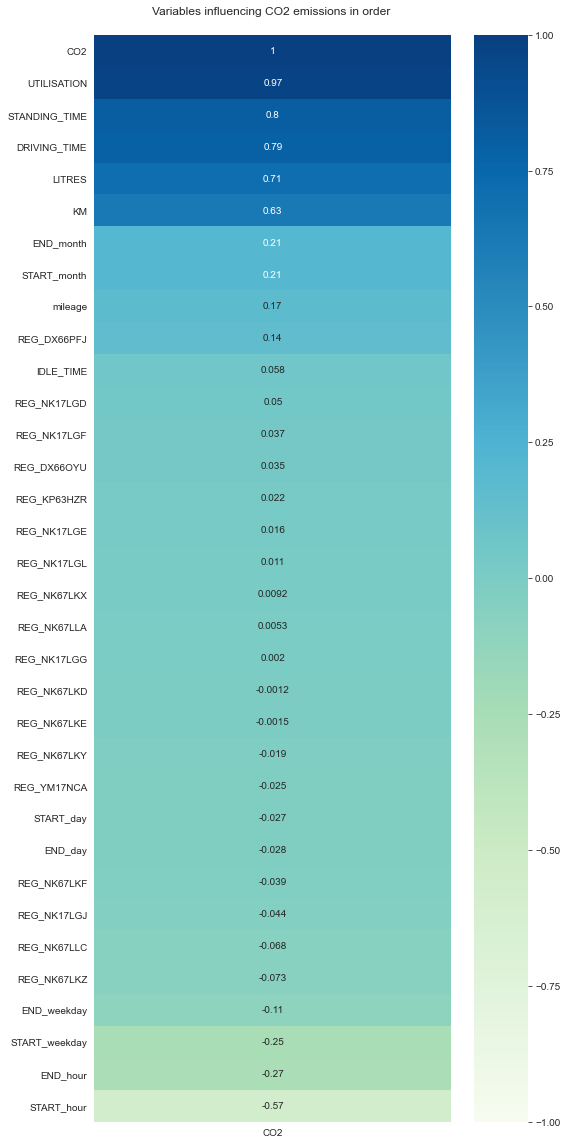

In [460]:
plt.rcParams['figure.figsize'] = [8, 20]

_ = sns.heatmap(df_final.corr()[['CO2']]
                .sort_values(by='CO2', ascending=False),
                vmin=-1,
                vmax=1,
                annot=True,
                cmap='GnBu');

_.set_title('Variables influencing CO2 emissions in order ',
            fontdict={'fontsize':12},
            pad=20);

plt.show()

In [463]:
df_final.drop(["UTILISATION"], axis = 1, inplace=True, errors = "ignore")

In [464]:
df_final

,DRIVING_TIME,IDLE_TIME,STANDING_TIME,KM,LITRES,mileage,CO2,START_month,START_day,START_weekday,START_hour,END_month,END_day,END_weekday,END_hour,REG_DX66OYU,REG_DX66PFJ,REG_KP63HZR,REG_NK17LGD,REG_NK17LGE,REG_NK17LGF,REG_NK17LGG,REG_NK17LGJ,REG_NK17LGL,REG_NK67LKD,REG_NK67LKE,REG_NK67LKF,REG_NK67LKX,REG_NK67LKY,REG_NK67LKZ,REG_NK67LLA,REG_NK67LLC,REG_YM17NCA
0,386,1,641,264.19,86.13,3.067340,335.314137,5,27,3,1,5,27,3,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,518,0,285,509.23,170.24,2.991248,261.994719,5,28,4,6,5,28,4,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,509,0,561,454.61,142.72,3.185328,349.000428,6,1,1,6,6,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,274,0,444,135.77,59.07,2.298459,233.970408,6,2,2,6,6,2,2,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,479,3,541,440.18,146.61,3.002387,333.358952,6,3,3,7,6,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,239,12,767,126.59,71.15,1.779199,319.158364,12,22,2,7,12,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4492,291,0,614,163.91,63.47,2.582480,283.452718,12,23,3,0,12,23,3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4493,1,0,1,0.09,0.15,0.600000,0.626415,12,24,4,11,12,24,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4494,0,36,34,0.00,1.92,0.000000,21.924520,12,30,3,13,12,30,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [466]:
df_final = df_final.rename(columns = {"KM":"Distance", "LITRES":"FuelUsed"})
df_final

,DRIVING_TIME,IDLE_TIME,STANDING_TIME,Distance,FuelUsed,mileage,CO2,START_month,START_day,START_weekday,START_hour,END_month,END_day,END_weekday,END_hour,REG_DX66OYU,REG_DX66PFJ,REG_KP63HZR,REG_NK17LGD,REG_NK17LGE,REG_NK17LGF,REG_NK17LGG,REG_NK17LGJ,REG_NK17LGL,REG_NK67LKD,REG_NK67LKE,REG_NK67LKF,REG_NK67LKX,REG_NK67LKY,REG_NK67LKZ,REG_NK67LLA,REG_NK67LLC,REG_YM17NCA
0,386,1,641,264.19,86.13,3.067340,335.314137,5,27,3,1,5,27,3,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,518,0,285,509.23,170.24,2.991248,261.994719,5,28,4,6,5,28,4,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,509,0,561,454.61,142.72,3.185328,349.000428,6,1,1,6,6,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,274,0,444,135.77,59.07,2.298459,233.970408,6,2,2,6,6,2,2,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,479,3,541,440.18,146.61,3.002387,333.358952,6,3,3,7,6,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,239,12,767,126.59,71.15,1.779199,319.158364,12,22,2,7,12,23,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4492,291,0,614,163.91,63.47,2.582480,283.452718,12,23,3,0,12,23,3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4493,1,0,1,0.09,0.15,0.600000,0.626415,12,24,4,11,12,24,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4494,0,36,34,0.00,1.92,0.000000,21.924520,12,30,3,13,12,30,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [473]:
x = df_final.drop('CO2', axis = 1)
y = df_final['CO2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

In [474]:
col_to_scale = ["DRIVING_TIME", "IDLE_TIME", "STANDING_TIME", "Distance", "FuelUsed", "mileage"]

scaler = MinMaxScaler()
x_train[col_to_scale] = scaler.fit_transform(x_train[col_to_scale])

c:\Users\saqui\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [475]:
x_test[col_to_scale] = scaler.transform(x_test[col_to_scale])

c:\Users\saqui\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [478]:
model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [10,50,100]
        }
    },
    # 'SVR': {
    #     'model': SVR(),
    #     'params': {
    #         'n_neighbors': list(range(1,10)),
    #         'p': [1,2],
    #     }
    # },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['poisson','mae','mse'],
            'max_depth':[3,5,10]
        }
    },
    "XGBRegressor": {
        "model": XGBRegressor(objective ='reg:squarederror'),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.01, .2, .3, .4, .5],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [479]:
scores = []

for model_name, mp in model_params.items():
    reg =  GridSearchCV(mp['model'], mp['params'], cv = 5, 
    scoring = "r2", return_train_score=False)
    reg.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': reg.best_score_,
        'best_params': reg.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [480]:
df_metrics

,model,best_score,best_params
0,random_forest,0.955221,"{'min_samples_leaf': 10, 'n_estimators': 100}"
1,decision_tree,0.949608,"{'criterion': 'mse', 'max_depth': 10}"
2,XGBRegressor,0.981049,"{'colsample_bytree': 0.9, 'learning_rate': 0.5..."


## Modelling after parameter tuning

In [481]:
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(colsample_bytree=0.9, learning_rate=0.5)
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [482]:
y_pred = reg_xgb.predict(x_test)

In [483]:
r2_score(y_test, y_pred)

0.9912348879578783

In [484]:
print(f"The Mean Average Error is: {mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error is: {mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, y_pred))}")

The Mean Average Error is: 7.73478030504605
The Mean Squared Error is: 118.58085266375825
The Root Mean Squared Error is: 10.889483581132682


## 